In [ ]:
%pip install matplotlib scipy pandas tensorflow xgboost scikit-learn json pickle

  Using cached matplotlib-3.7.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.2 MB)
  Using cached pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
  Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl (297.1 MB)


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import random as rnd
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]=""

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras import layers, models

2024-04-29 13:59:04.317222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 13:59:05.874116: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-04-29 13:59:05.874353: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-04-29 13:59:05.874381: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
tf.config.list_physical_devices()

2024-04-29 13:59:07.545894: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-29 13:59:07.545936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: hires-lambda1.cs.unc.edu
2024-04-29 13:59:07.545947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: hires-lambda1.cs.unc.edu
2024-04-29 13:59:07.546032: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.104.12
2024-04-29 13:59:07.546069: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.104.12
2024-04-29 13:59:07.546079: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 535.104.12


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
from xgboost import XGBClassifier
from scipy.linalg import null_space
from sklearn.cross_decomposition import CCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
# from google.colab import drive
import pickle
import json
# drive.mount('/content/drive')

In [6]:
r_quad = 80 + np.sin(np.linspace(0, np.pi, 100)) * 40


all_samples = []
Y = []
for quads in range(6):
  thet_quad = np.linspace(0, np.pi/3, 100) + quads * np.pi/3
  mus = np.vstack([r_quad * np.sin(thet_quad), r_quad * np.cos(thet_quad)]).T
  samples = np.random.normal(size=(5*100*2)).reshape(5, 100, 2) * 13 * np.random.uniform(size=(5*100*2)).reshape(5, 100, 2) + \
              mus[None, :, :]
  all_samples.append(samples.reshape(-1, 2))

all_samples = np.concatenate(all_samples, axis=0)

Y += [1]*len(all_samples)

r_quad = 40 + np.sin(np.linspace(0, np.pi, 100)) * 25


all_samplesn = []
segs = 4
for quads in range(segs):
  thet_quad = np.linspace(0, np.pi/(segs/2), 100) + quads * np.pi/(segs/2) + np.pi/6
  mus = np.vstack([r_quad * np.sin(thet_quad), r_quad * np.cos(thet_quad)]).T
  samples = np.random.normal(size=(4*100*2)).reshape(4, 100, 2) * 9 * np.random.uniform(size=(4*100*2)).reshape(4, 100, 2) + \
              mus[None, :, :]
  all_samplesn.append(samples.reshape(-1, 2))

all_samplesn = np.concatenate(all_samplesn, axis=0)
Y += [0]*len(all_samplesn)


In [7]:
all_samplesn.shape

(1600, 2)

In [8]:
X = np.concatenate([all_samples, all_samplesn], axis=0)
Y = np.array(Y)

In [9]:
r_quad = 65 + np.sin(np.linspace(0, np.pi, 100)) * 40


all_samples = []
t_Y = []
for quads in range(6):
  thet_quad = np.linspace(0, np.pi/3, 100) + quads * np.pi/3
  mus = np.vstack([r_quad * np.sin(thet_quad), r_quad * np.cos(thet_quad)]).T
  samples = np.random.normal(size=(5*100*2)).reshape(5, 100, 2) * 13 * np.random.uniform(size=(5*100*2)).reshape(5, 100, 2) + \
              mus[None, :, :]
  all_samples.append(samples.reshape(-1, 2))

all_samples = np.concatenate(all_samples, axis=0)

t_Y += [1]*len(all_samples)

r_quad = 55 + np.sin(np.linspace(0, np.pi, 100)) * 25


all_samplesn = []
segs = 4
for quads in range(segs):
  thet_quad = np.linspace(0, np.pi/(segs/2), 100) + quads * np.pi/(segs/2) + np.pi/6
  mus = np.vstack([r_quad * np.sin(thet_quad), r_quad * np.cos(thet_quad)]).T
  samples = np.random.normal(size=(4*100*2)).reshape(4, 100, 2) * 9 * np.random.uniform(size=(4*100*2)).reshape(4, 100, 2) + \
              mus[None, :, :]
  all_samplesn.append(samples.reshape(-1, 2))

all_samplesn = np.concatenate(all_samplesn, axis=0)
t_Y += [0]*len(all_samplesn)

In [10]:
all_samplesn.shape

(1600, 2)

In [11]:
test_X = np.concatenate([all_samples, all_samplesn], axis=0)
test_Y = np.array(t_Y)

In [12]:
test_X.shape, X.shape

((4600, 2), (4600, 2))

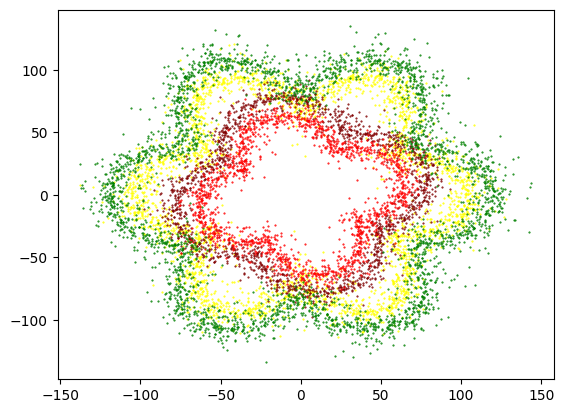

In [13]:
import matplotlib.pyplot as plt
plt.plot(test_X[:3000, 0], test_X[:3000, 1], 'o', color='yellow', ms=0.5)
plt.plot(test_X[3000:, 0], test_X[3000:, 1], 'o', color='maroon', ms=0.5)
plt.plot(X[:3000, 0], X[:3000, 1], 'o', color='green', ms=0.5)
plt.plot(X[3000:, 0], X[3000:, 1], 'o', color='red', ms=0.5)

In [14]:
# standardize the data
mu_x = np.mean(X, 0, keepdims=True)
#sigma_x = np.std(X, 0, keepdims=True)
sigma_x = np.ones_like(mu_x)
X = (X-mu_x)/sigma_x

In [16]:
print(X.shape)
print(Y.shape)

(4600, 2)
(4600,)


In [15]:
class RandFeats:
  # def __init__(self, sigma_rot, d, D=128):
  def __init__(self, sigma_rot, d, D=10):

    self.sigmas = [sigma_rot/4, sigma_rot/2, sigma_rot, sigma_rot*2, sigma_rot*4]
    self.D = D
    self.Ws = []
    for sigma in self.sigmas:
      self.Ws.append(np.float32(np.random.randn(d, D)/sigma))
    self.Ws = np.stack(self.Ws, 0)

  def get_features(self, x_in):
    # phis = []
    # TODO: vectorize
    # for W in Ws:
    #   XW = np.matmul(x_in, W)
    #   phis.append(
    #     np.concatenate([np.sin(XW), np.cos(XW)], -1))
    # return np.concatenate(phis, -1)
    phis = tf.matmul(x_in, self.Ws)  # k x N x D
    phis = tf.transpose(phis, [1, 2, 0])  # N x D x k
    phis = tf.concat((tf.sin(phis), tf.cos(phis)), 1)
    return tf.reshape(phis, [x_in.shape[0], -1])

  def __call__(self, x_in):
    return self.get_features(x_in)

# def define_rand_feats(ndata_feats, nrand_feats=1000, gamma=1.0):
def define_rand_feats(X, xD):
  """
  Args:
    ndata_feats: scalar value of total number of data features
    nrand_feats: scalar value of total number of desired random features
    gamma: Float, scale of frequencies

  Returns:
    Ws: ndata_feats x nrand_feats weight matrix
    bs: 1 x nrand_feats bias vector
  """
  tf.random.set_seed(123129) # For reproducibility
  from scipy.spatial import distance
  rprm = np.random.permutation(X.shape[0])
  ds = distance.cdist(np.array(X)[rprm[:100], :], np.array(X)[rprm[100:], :])
  sigma_rot = np.mean(np.sort(ds)[:, 5])
  model = RandFeats(sigma_rot, X.shape[1], X.shape[1]*xD)

  # Ws = gamma*tf.random.normal((ndata_feats, nrand_feats))
  # bs = 2.0*np.pi*tf.random.uniform((1,nrand_feats))
  # return Ws, bs
  return model

In [16]:
Dx = [2, 4, 6, 8, 10, 16]

In [17]:
def get_rand_feats(X, model):
  """
  Args:
    X: N x d matrix of input features
    Ws: ndata_feats x nrand_feats weight matrix
    bs: 1 x nrand_feats bias vector

  Returns:
    Phis: N x D matrix of random features
  """
  # XWs = tf.matmul(X, Ws)
  # return tf.cos(XWs+bs)
  return model(X)

In [18]:
def linear_coefs(X, Y):
  """
  Args:
    X: N x d matrix of input features
    Y: N x 1 matrix (column vector) of output response

  Returns:
    Beta: d x 1 matrix of linear coefficients
  """
  clf = LogisticRegression(random_state=0, solver='liblinear').fit(X, Y)
  # clf = LogisticRegression(random_state=0).fit(X, Y)
  # print(clf.score(X, Y))
  wgts = np.hstack((clf.intercept_[:,None], clf.coef_))
  prd = (1 / (1 + np.exp(-np.concatenate([np.ones((X.shape[0], 1)), X], axis=-1) @ wgts.T)) > 0.5) *1.0
  # print(np.mean(prd[:, 0]==Y))
  return wgts
  # beta = tf.linalg.solve(tf.matmul(tf.transpose(X),X), tf.matmul(tf.transpose(X), Y[:, None]))
  # return beta

In [19]:
def project_and_filter(X, dir, percentile=75):
  projs = np.dot(X, dir)
  thresh = np.percentile(projs, 100 - percentile)
  filtered_idxs = projs >= thresh
  return X[filtered_idxs], filtered_idxs

In [21]:
def get_models(X, Y, dirs, model, percentile=75):
  #X_subsets = []
  #data_ids = []
  #Y_subsets = []
  betas = []
  i = 0
  for dir in dirs: # TODO: Vectorize
    if i % 25 == 0: print(f"Step {i}")
    X_sub, X_ids = project_and_filter(X, dir, percentile)
    Y_sub = Y[X_ids]
    # beta = linear_coefs(get_rand_feats(X_sub, model), Y_sub)
    est = XGBClassifier(n_estimators=4)
    est.fit(get_rand_feats(X_sub, model), Y_sub)
    # print(est.score(get_rand_feats(X_sub, model), Y_sub))
    betas.append(est)

    #X_subsets.append(X_sub)
    #data_ids.append(X_ids)
    #Y_subsets.append(Y_sub)
    # betas.append(beta)
    i += 1
    if i == len(dirs) - 1: print(f"Done")

  # cant do this because subsets of variable sizes
  #X_subsets = np.array(X_subsets)
  #data_ids = np.array(data_ids)
  #Y_subsets = np.array(Y_subsets)
  # betas = np.array(betas)

  return betas
  #return X_subsets, data_ids, Y_subsets, betas

In [22]:
np.random.seed(74)
model = define_rand_feats(X, Dx[2])

N = 2**10    # ~ 8k
d = X.shape[-1]
random_dirs = np.random.randn(N, d) # Maybe do the random directions in the random feature space??? Feel like that makes more sense
# Some other strategies:
### Completely random
### Maybe draw random directions, but also some one hot directions (essentially taking the highest/lowest values of certain features as a subset)
### Second idea in theory would increase variance between subsets - thinking similar instances have similar feature values
random_dirs = random_dirs / np.linalg.norm(random_dirs, axis=1, keepdims=True)

#X_subsets, data_ids, Y_subsets, betas = get_models(X, Y, random_dirs, Ws, bs, percentile=33)
betas = get_models(X, Y, random_dirs, model, percentile=80)

Step 0


2024-04-29 14:00:00.666020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Step 25
Step 50
Step 75
Step 100
Step 125
Step 150
Step 175
Step 200
Step 225
Step 250
Step 275
Step 300
Step 325
Step 350
Step 375
Step 400
Step 425
Step 450
Step 475
Step 500
Step 525
Step 550
Step 575
Step 600
Step 625
Step 650
Step 675
Step 700
Step 725
Step 750
Step 775
Step 800
Step 825
Step 850
Step 875
Step 900
Step 925
Step 950
Step 975
Step 1000
Done


In [51]:
np.save('toy-random_dirs1.npy', random_dirs)
np.save('toy-betas1.npy', betas)
np.save('toy-Ws1.npy', model.Ws)

# random_dirs = np.load('random_dirs.npy')
# betas = np.load('betas.npy')

In [ ]:
random_dirs = tf.constant(np.load('/content/drive/My Drive/ml-ood/toy-random_dirs.npy'))
betas = tf.squeeze(tf.constant(np.load('/content/drive/My Drive/ml-ood/toy-betas.npy')))
model = define_rand_feats(X)
model.Ws = tf.constant(np.load('/content/drive/My Drive/ml-ood/toy-Ws.npy'))

In [52]:
betas = tf.squeeze(betas)
print(betas.shape)
random_dirs = tf.constant(random_dirs)
print(random_dirs.shape)

(8192, 121)
(8192, 2)


In [53]:
var = tf.math.reduce_variance(betas, axis=0)
mean_var = tf.reduce_mean(var)
print(mean_var)

tf.Tensor(0.8169842517127999, shape=(), dtype=float64)


In [49]:
sample = 19
def softmax(X, wgts):
  sd = (1 / (1 + np.exp(-np.concatenate([np.ones((X.shape[0], 1)), X], axis=-1) @ wgts.numpy().T)) > 0.5) *1.0
  return sd[:]

X_sub, X_ids = project_and_filter(X, random_dirs[sample], 75)
Y_sub = Y[X_ids]

# prd = softmax(get_rand_feats(tf.cast(X_sub, dtype=tf.float32), model), betas[sample])
prd = betas[sample].predict(get_rand_feats(tf.cast(X_sub, dtype=tf.float32), model))

np.mean(prd == Y_sub)

0.9959420289855072

In [50]:
external_X = tf.cast(test_X, tf.float32)
external_Y = test_Y
external_X = (external_X-mu_x)/sigma_x

X_sub, X_ids = project_and_filter(external_X, random_dirs[sample], 75)
Y_sub = external_Y[X_ids]
# prd = softmax(get_rand_feats(X_sub, model), betas[sample])
prd = betas[sample].predict(get_rand_feats(X_sub, model))
np.mean(prd == Y_sub)

0.7597101449275362

## Should test Betas performance first

In [79]:
from tensorflow.keras import layers, models

beta_dim = betas.shape[-1]
input_dir_dim = random_dirs.shape[-1]
latent_dim = 8

# Encoder
beta_input = layers.Input(shape=(beta_dim,))
dir_input = layers.Input(shape=(input_dir_dim,))
encoder_inputs = layers.Concatenate()([beta_input, dir_input])
# x = layers.Dense(512, activation=tf.nn.elu)(encoder_inputs)
# x = layers.Dense(256, activation=tf.nn.elu)(x)
# x = layers.Dense(128, activation=tf.nn.elu)(x)
x = layers.Dense(32, activation=tf.nn.elu)(encoder_inputs)
# x = layers.Dense(32, activation=tf.nn.elu)(x)
x = layers.Dense(8, activation=tf.nn.elu)(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

def sampling(args):
  z_mean, z_log_var = args
  eps = tf.random.normal(shape=tf.shape(z_mean))
  return z_mean + tf.exp(0.5 * z_log_var) * eps

z = layers.Lambda(sampling)([z_mean, z_log_var])


### Using direction in Decoder is weird
### Likely just train VAE solely on betas with directions


# Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
decoder_dir_input = layers.Input(shape=(input_dir_dim,))
decoder_inputs = layers.Concatenate()([latent_inputs, decoder_dir_input])
# x = layers.Dense(32, activation=tf.nn.elu)(decoder_inputs)
x = layers.Dense(8, activation=tf.nn.elu)(decoder_inputs)
# x = layers.Dense(32, activation=tf.nn.elu)(decoder_inputs)
x = layers.Dense(32, activation=tf.nn.elu)(x)
# x = layers.Dense(256, activation=tf.nn.elu)(decoder_inputs)
# x = layers.Dense(512, activation=tf.nn.elu)(x)
beta_output = layers.Dense(beta_dim)(x)

# Instantiate model
encoder = models.Model([beta_input, dir_input], [z_mean, z_log_var, z], name="encoder")
decoder = models.Model([latent_inputs, decoder_dir_input], beta_output, name="decoder")

# VAE
outputs = decoder([encoder([beta_input, dir_input])[2], dir_input])
vae = models.Model([beta_input, dir_input], outputs, name="vae")
vae.encoder = encoder
vae.decoder = decoder

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
vae.save_weights('./checkpoints/my_checkpoint')

NameError: name 'vae' is not defined

In [ ]:
vae.load_weights('./checkpoints/my_checkpoint')

In [ ]:
!zip -r checkpoints-toy.zip checkpoints/

  adding: checkpoints/ (stored 0%)
  adding: checkpoints/my_checkpoint.data-00000-of-00001 (deflated 10%)
  adding: checkpoints/my_checkpoint.index (deflated 59%)
  adding: checkpoints/checkpoint (deflated 49%)


In [ ]:
def vae_loss(inputs, outputs, z_mean, z_log_var, reg=1.0):
  # recon_loss = tf.reduce_mean(tf.reduce_sum(tf.square(inputs - outputs), axis=-1))
  recon_loss = tf.reduce_mean(1-tf.reduce_sum(tf.linalg.normalize(tf.cast(inputs, dtype=tf.float32), axis=-1)[0] *
                                              tf.linalg.normalize(outputs, axis=-1)[0], axis=-1))
  kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1))
  total_loss = recon_loss + 0.1 * kl_loss
  return total_loss, recon_loss, kl_loss

In [ ]:
opt = tf.keras.optimizers.Adam()

def train_step(model, inputs, dir_inputs):
  with tf.GradientTape() as tape:
    z_mean, z_log_var, z = model.encoder([inputs, dir_inputs])
    outputs = model.decoder([z, dir_inputs])
    total_loss, recon_loss, kl_loss = vae_loss(inputs, outputs, z_mean, z_log_var)
  grads = tape.gradient(total_loss, model.trainable_variables)
  opt.apply_gradients(zip(grads, model.trainable_variables))
  return total_loss, recon_loss, kl_loss

In [ ]:
def batch(betas, dirs, batch_size):
  num_samples = betas.shape[0]
  indices = np.arange(num_samples)
  np.random.shuffle(indices)
  betas = np.array(betas)[indices]
  dirs = np.array(dirs)[indices]
  for i in range(0, betas.shape[0], batch_size):
    yield betas[i:i+batch_size], dirs[i:i+batch_size]

In [ ]:
epochs = 2000
batch_size = 32

for i in range(epochs):
  print(f"Epoch {i}")
  for step, (batch_betas, batch_dirs) in enumerate(batch(betas, random_dirs, batch_size)):
    loss_vals = train_step(vae, batch_betas, batch_dirs)
    if step % 8 == 0: # tmp
      print(f"Step {step}: loss = {loss_vals[0].numpy()}, recon_loss = {loss_vals[1].numpy()}, kl_loss = {loss_vals[2].numpy()}")
  print()

Epoch 0
Step 0: loss = 1.5813930034637451, recon_loss = 0.9821420907974243, kl_loss = 5.992508411407471
Step 8: loss = 1.1585819721221924, recon_loss = 0.8957036733627319, kl_loss = 2.6287832260131836
Step 16: loss = 0.953609824180603, recon_loss = 0.8122104406356812, kl_loss = 1.4139935970306396
Step 24: loss = 0.8573048114776611, recon_loss = 0.7640621662139893, kl_loss = 0.9324265718460083
Step 32: loss = 0.763311505317688, recon_loss = 0.6787495613098145, kl_loss = 0.8456193208694458
Step 40: loss = 0.5916518568992615, recon_loss = 0.5187865495681763, kl_loss = 0.728652834892273
Step 48: loss = 0.5100314021110535, recon_loss = 0.4299616813659668, kl_loss = 0.8006973266601562
Step 56: loss = 0.40169620513916016, recon_loss = 0.31018567085266113, kl_loss = 0.9151054620742798
Step 64: loss = 0.36303338408470154, recon_loss = 0.2615436613559723, kl_loss = 1.014897108078003
Step 72: loss = 0.2773500978946686, recon_loss = 0.18145139515399933, kl_loss = 0.9589871168136597
Step 80: loss =

KeyboardInterrupt: 

In [ ]:
# Dont really think this works, since the latent space should be conditioned on the direction
# Just to try something
# Likely better to just have VAE solely on betas w/o directions
def generate_new_betas(model, num_samples=1):
  random_dirs = np.random.randn(num_samples, d)
  random_dirs = random_dirs / np.linalg.norm(random_dirs, axis=1, keepdims=True)
  random_dirs = tf.constant(random_dirs)
  latent_samples = tf.random.normal(shape=(num_samples, latent_dim))
  return model.decoder([latent_samples, random_dirs])

In [ ]:
drawn_betas = generate_new_betas(vae, 50_000)

In [25]:
external_X = tf.cast(test_X, tf.float32)
external_Y = test_Y
external_X = (external_X-mu_x)/sigma_x
external_randfeats_X = get_rand_feats(external_X, model)

In [24]:
pperm = np.random.permutation(len(external_X))

external_X = tf.constant(np.array(external_X)[pperm])
external_Y = external_Y[pperm]

In [53]:

external_randfeats_X = get_rand_feats(external_X, model)
randfeats_X = get_rand_feats(X, model)

In [ ]:
print(external_X[0])
print(external_randfeats_X[0][:10])
print(external_Y[0])

tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(2048,), dtype=float32)
tf.Tensor(
[-0.9500462  -0.9970952  -0.7351471   0.25615945 -0.09993453  0.05183483
 -0.5821794   0.11442215 -0.07140958  0.35098624], shape=(10,), dtype=float32)
0


In [ ]:
print(external_X.shape)
print(external_randfeats_X.shape)
print(external_Y.shape)

(24599, 2048)
(24599, 1000)
(24599,)


In [ ]:
print(external_X[:10])
print(external_Y[:10])

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10, 2048), dtype=float32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1], shape=(10,), dtype=int64)


In [26]:
def get_preds(randfeats, betas):
  """
  Args:
    randfeats: N x d
    betas: M x d
  Return:
    preds: N x M - each beta predicts on each instance
  """
  #preds = []
  #for i in range(len(betas)):
  #  if i % 25_000 == 0: print(f"{i} Predictions Made")
  #  preds.append(np.matmul(randfeats, betas[i]))
  #return np.array(preds)
  # sd = (1 / (1 + np.exp(-np.concatenate([np.ones((randfeats.shape[0], 1)), randfeats], axis=-1) @ betas.numpy().T)))
  # return sd[:]
  return np.concatenate([_b.predict_proba(randfeats)[:, 1][None, :] for _b in betas], axis=0).T

  # betaT = np.transpose(betas) # d x M
  # preds = np.matmul(randfeats, betaT) # N x M
  # return preds

def aggregate_preds(preds):
  mean_pred = np.mean(preds, axis=-1, keepdims=False)
  std_pred = np.std(preds, axis=-1, keepdims=False)
  # Typically 0.5 threshold, just was all 0s
  return np.float32(mean_pred), np.float32(mean_pred), np.float32(std_pred)

def get_preds_and_aggregate(randfeats, betas):
  preds = get_preds(randfeats, betas)
  return *aggregate_preds(preds), preds > 0.5


ext_probs, mp_rand, sp_rand, pred = get_preds_and_aggregate(external_randfeats_X, betas)
# ext_preds, mp_rand, sp_rand = get_preds_and_aggregate(randfeats_X, drawn_betas)

In [60]:
np.concatenate([_b.predict_proba(external_randfeats_X) for _b in betas], axis=0).T

KeyboardInterrupt: 

In [63]:
betas[1].predict_proba(external_randfeats_X)

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       ...,
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.  , 1.  ]])

In [ ]:
drawn_betas[0].numpy(), betas[0].numpy()

(array([ 3.39556664e-01, -2.03048494e-02,  1.17702056e-02,  3.79525311e-02,
         6.31155819e-03,  1.64517671e-01, -5.44307530e-02, -2.49546301e-02,
        -2.15306580e-02, -3.94632183e-02,  1.62136942e-01,  2.99184164e-03,
         5.24101183e-02, -2.67707519e-02,  2.38013286e-02, -8.77454281e-02,
        -8.27260967e-03, -3.74255888e-03, -1.22376727e-02, -2.77444664e-02,
        -4.20102775e-02, -7.00620655e-03, -1.82317160e-02,  4.39216420e-02,
        -6.46829605e-03,  1.49246026e-02, -1.96903553e-02,  1.12965368e-02,
        -1.37557119e-01, -7.04443455e-03, -1.08949095e-01,  1.11868717e-02,
        -4.77712601e-05,  4.85166162e-03, -5.51169291e-02,  4.17435646e-01,
         2.16602702e-02,  7.60316895e-03, -1.09700114e-03,  2.71176826e-02,
        -4.16162014e-01, -1.44954650e-02,  1.67214312e-02, -6.58262223e-02,
        -5.03937826e-02,  1.09159760e-01, -6.36703335e-03, -1.61549076e-04,
         4.59039677e-03, -3.57689187e-02, -2.53416449e-02, -1.14397481e-02,
         2.5

In [ ]:
print(ext_preds.shape)

(937,)


In [ ]:
print(ext_preds)

[0. 0. 1. ... 1. 1. 1.]


In [ ]:
len(ext_preds), external_X.shape

(3800, TensorShape([3800, 2]))

In [69]:
ext_probs.shape

(4600,)

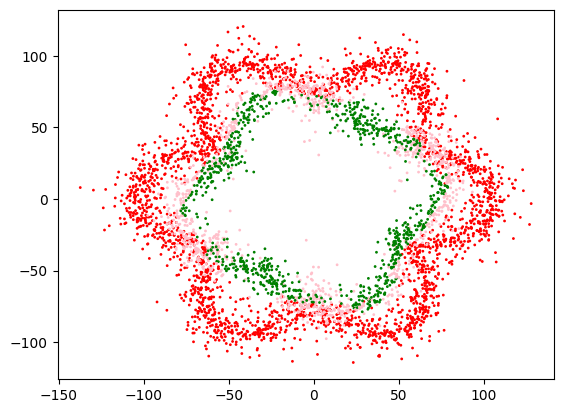

In [27]:
import matplotlib.pyplot as plt
clr = [['green', 'pink'], ['pink', 'red']]
plt.scatter(external_X[:, 0], external_X[:, 1], c=[clr[int(tru)][int(prd)] for tru, prd in zip(external_Y, np.float32(ext_probs > 0.5))], s=1)
# plt.scatter(external_X[:, 0], external_X[:, 1], c=[clr[int(tru)][int(prd)] for tru, prd in zip(external_Y, pred[:, 455])], s=1)

In [71]:
drawn_betas.shape

NameError: name 'drawn_betas' is not defined

In [28]:
ext_preds = np.float32(ext_probs > 0.5)
print("First 10 Predictions: ", ext_preds[:10])
print("Total Positive Preds: ", sum(ext_preds))
print("Total Preds: ", len(ext_preds))
print("% Positive Preds: ", sum(ext_preds) / len(ext_preds))
print()
print("First 10 Ground Truth: ", external_Y[:10])
print("Total Positive Ground Truth: ", sum(external_Y))
print("Total Ground Truth: ", len(external_Y))
print("% Positive Ground Truth: ", sum(external_Y) / len(external_Y))
print()
print("Accuracy: ", sum(ext_preds == external_Y) / len(ext_preds))

First 10 Predictions:  [0. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
Total Positive Preds:  3384.0
Total Preds:  4600
% Positive Preds:  0.7356521739130435

First 10 Ground Truth:  [1 1 1 1 1 1 1 1 1 1]
Total Positive Ground Truth:  3000
Total Ground Truth:  4600
% Positive Ground Truth:  0.6521739130434783

Accuracy:  0.7726086956521739


/tmp/ipykernel_2062776/2574676416.py:9: RuntimeWarning: invalid value encountered in true_divide
  precision = [tp/(tp+fp) for tp, fp in zip(tps, fps)]


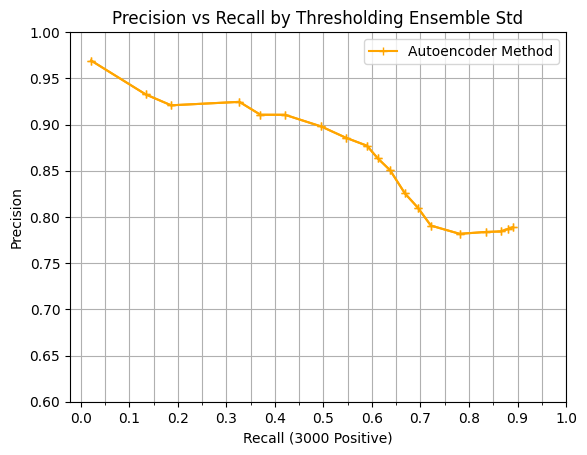

In [29]:
threshs = sp_rand
std_threshs = np.linspace(np.min(threshs), np.max(threshs), 20) # Diff std. dev. thresholds (20 of them in this case)
reject_rate = [1 - np.mean((threshs<=s)) for s in std_threshs] # Portion of instances rejected @ each std threshold
accus = [np.mean((ext_preds==external_Y)[(threshs<=s)]) for s in std_threshs] # Acc @ each std thresh.
tps = [np.sum(((external_Y)*(ext_preds==external_Y))[(threshs<=s)]) for s in std_threshs]  # correct and positive
fps = [np.sum(((ext_preds)*(ext_preds!=external_Y))[(threshs<=s)]) for s in std_threshs]  # incorrect and predicted positive
pos = np.sum(external_Y)
recall = [tp/pos for tp in tps]
precision = [tp/(tp+fp) for tp, fp in zip(tps, fps)]
plt.plot(recall, precision, marker='+', c='orange')

plt.plot(recall, precision, marker='+', c='orange')
plt.xticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(0, 1.01, step=0.05), minor=True)
plt.yticks(np.arange(.6, 1.01, step=0.05))
plt.grid(True, which='both')
plt.xlabel('Recall ({} Positive)'.format(int(pos)))
plt.ylabel('Precision')
plt.title('Precision vs Recall by Thresholding Ensemble Std')
plt.legend(['Autoencoder Method'])

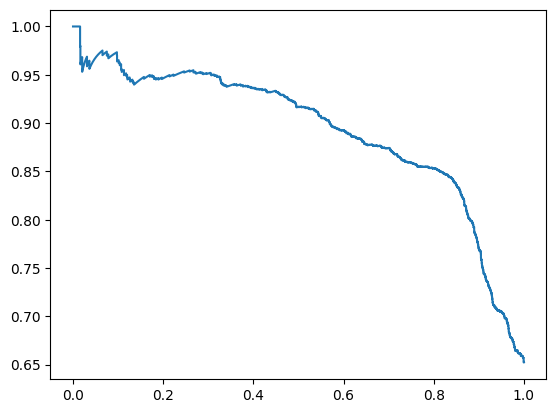

In [30]:
from sklearn.metrics import precision_recall_curve
p, r, thres = precision_recall_curve(external_Y, ext_probs)

plt.plot(r, p)

In [ ]:
print(accus)

[0.0, 0.5, 0.4738372093023256, 0.4956921309592188, 0.49409681227863045, 0.49305069493050696, 0.4944530357022793, 0.49494787489975944, 0.49523989958793163, 0.49640065362363645, 0.4956647398843931, 0.4954388303411505, 0.4954494914137462, 0.49574293900941463, 0.4954910841800302, 0.4957665065537735, 0.49576926206167116, 0.49581164606376055, 0.4957713263397577, 0.49579251189072726]
